In [1]:
from pomegranate import *

In [2]:
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

In [3]:
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

In [4]:
monty = ConditionalProbabilityTable(
    [['A','A','A',0.0],
     ['A','A','B',0.5],
     ['A','A','C',0.5],
     ['A','B','A',0.0],
     ['A','B','B',0.0],
     ['A','B','C',1.0],
     ['A','C','A',0.0],
     ['A','C','B',1.0],
     ['A','C','C',0.0],
     ['B','A','A',0.0],
     ['B','A','B',0.0],
     ['B','A','C',1.0],
     ['B','B','A',0.5],
     ['B','B','B',0.0],
     ['B','B','C',0.5],
     ['B','C','A',1.0],
     ['B','C','B',0.0],
     ['B','C','C',0.0],
     ['C','A','A',0.0],
     ['C','A','B',1.0],
     ['C','A','C',0.0],
     ['C','B','A',1.0],
     ['C','B','B',0.0],
     ['C','B','C',0.0],
     ['C','C','A',0.5],
     ['C','C','B',0.5],
     ['C','C','C',0.0],],
    [guest, prize]
)

In [5]:
s1 = State(guest, name='guest')
s2 = State(prize, name='prize')
s3 = State(monty, name='monty')

In [6]:
model = BayesianNetwork('Monty Hall Problem')

In [7]:
model.add_states(s1, s2, s3)

In [8]:
model.add_transition(s1, s3)
model.add_transition(s2, s3)

In [9]:
model.bake()

In [10]:
model.probability(['A','B','C'])

0.11111111111111109

In [11]:
model.probability(['A','B','B'])

0.0

In [12]:
print(model.predict_proba({}))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.3333333333333333,
            "B" :0.3333333333333333,
            "C" :0.3333333333333333
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.3333333333333333,
            "B" :0.3333333333333333,
            "C" :0.3333333333333333
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "C" :0.3333333333333333,
            "B" :0.3333333333333333,
            "A" :0.3333333333333333
        }
    ],
    "frozen" :false
}]


In [13]:
model.predict_proba(['A',None,None])

array(['A',
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.3333333333333333,
            "B" :0.3333333333333333,
            "C" :0.3333333333333333
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "C" :0.49999999999999994,
            "B" :0.49999999999999994,
            "A" :0.0
        }
    ],
    "frozen" :false
}], dtype=object)

In [14]:
burglary = DiscreteDistribution({1:0.001, 0:0.999})

In [15]:
earthquake = DiscreteDistribution({1: 0.002, 0: 0.998})

In [16]:
alarm = ConditionalProbabilityTable(
    [[1,1,1,0.95],
     [1,1,0,0.05],
     [1,0,1,0.94],
     [1,0,0,0.06],
     [0,1,1,0.29],
     [0,1,0,0.71],
     [0,0,1,0.001],
     [0,0,0,0.999]], [burglary, earthquake]
)

In [17]:
johncalls = ConditionalProbabilityTable(
    [[1,1,0.90],
     [1,0,0.10],
     [0,1,0.05],
     [0,0,0.95]], [alarm]
)

In [18]:
marycalls = ConditionalProbabilityTable(
    [[1,1,0.70],
     [1,0,0.30],
     [0,1,0.01],
     [0,0,0.99]], [alarm]
)

In [19]:
s1 = State(burglary, name='burglary')
s2 = State(earthquake, name='earthquake')
s3 = State(alarm, name='alarm')
s4 = State(johncalls, name='johncalls')
s5 = State(marycalls, name='marycalls')

In [20]:
model = BayesianNetwork('Buggy Burglary Alarm')

In [21]:
model.add_states(s1,s2,s3,s4,s5)

In [22]:
model.add_transition(s1,s3)

In [23]:
model.add_transition(s2,s3)

In [24]:
model.add_transition(s3,s4)

In [25]:
model.add_transition(s3,s5)

In [26]:
model.bake()

In [27]:
model.predict_proba({})

array([{
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1" :0.001000000000000444,
            "0" :0.9989999999999996
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1" :0.002000000000000442,
            "0" :0.9979999999999996
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.997483557999999,
            "1" :0.002516442000000935
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.9478610242999992,
            "1" :0.0521389757000008
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtyp

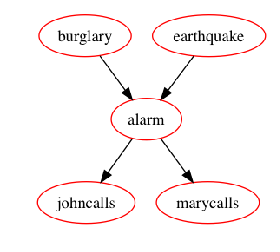

In [28]:
model.plot()

In [29]:
model.probability([1,1,1,1,1])

1.1969999999999995e-06

In [30]:
ret = 0
for b in [0,1]:
    for e in [0,1]:
        for a in [0,1]:
            ret += model.probability([b,e,a,1,1])

In [31]:
ret

0.0020841002390000014

In [32]:
model.predict_proba({'johncalls':1,'marycalls':1})

array([{
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1" :0.2841718353644582,
            "0" :0.7158281646355418
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1" :0.17606683840509577,
            "0" :0.8239331615949043
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.23930796113684336,
            "1" :0.7606920388631567
        }
    ],
    "frozen" :false
},
       1, 1], dtype=object)

In [33]:
p_j_m_b = 0
for e in [0,1]:
    for a in [0,1]:
        p_j_m_b += model.probability([0,e,a,1,0])

In [34]:
ret2 = p_j_m_b / 0.9989999999999996

In [35]:
print(ret2)

0.049847949000000016


In [36]:
Age = DiscreteDistribution(
    {'0+':0.10, '30':0.30, '65': 0.60}
)

In [37]:
CT = DiscreteDistribution(
    {'IS': 0.7, 'HS': 0.3}
)

In [38]:
MRI = DiscreteDistribution(
    {'IS': 0.7, 'HS': 0.3}
)

In [39]:
Anti = DiscreteDistribution(
    {'Y': 0.5, 'N': 0.5}
)

In [40]:
Stroke = ConditionalProbabilityTable(
    [['IS', 'IS', 'IS', 0.8],
     ['IS', 'HS', 'IS', 0.5],
     ['HS', 'IS', 'IS', 0.5],
     ['HS', 'HS', 'IS', 0.0],
     
     ['IS', 'IS', 'HS', 0.0],
     ['IS', 'HS', 'HS', 0.4],
     ['HS', 'IS', 'HS', 0.4],
     ['HS', 'HS', 'HS', 0.9],
     
     ['IS', 'IS', 'SM', 0.2],
     ['IS', 'HS', 'SM', 0.1],
     ['HS', 'IS', 'SM', 0.1],
     ['HS', 'HS', 'SM', 0.1]], [CT, MRI]
)

In [41]:
Mortality = ConditionalProbabilityTable(
    [['IS', 'Y', 'F', 0.28],
     ['HS', 'Y', 'F', 0.99],
     ['SM', 'Y', 'F', 0.10],
     ['IS', 'N', 'F', 0.56],
     ['HS', 'N', 'F', 0.58],
     ['SM', 'N', 'F', 0.05],
     ['IS', 'Y', 'T', 0.72],
     ['HS', 'Y', 'T', 0.01],
     ['SM', 'Y', 'T', 0.90],
     ['IS', 'N', 'T', 0.44],
     ['HS', 'N', 'T', 0.42],
     ['SM', 'N', 'T', 0.95]], [Stroke, Anti]
)

In [42]:
Disability = ConditionalProbabilityTable(
    [
        ['IS', '0+', 'Neg', 0.80],
        ['HS', '0+', 'Neg', 0.70],
        ['SM', '0+', 'Neg', 0.90],
        ['IS', '30', 'Neg', 0.60],
        ['HS', '30', 'Neg', 0.50],
        ['SM', '30', 'Neg', 0.40],
        ['IS', '65', 'Neg', 0.30],
        ['HS', '65', 'Neg', 0.20],
        ['SM', '65', 'Neg', 0.10],
        
        ['IS', '0+', 'Mod', 0.10],
        ['HS', '0+', 'Mod', 0.20],
        ['SM', '0+', 'Mod', 0.05],
        ['IS', '30', 'Mod', 0.30],
        ['HS', '30', 'Mod', 0.40],
        ['SM', '30', 'Mod', 0.30],
        ['IS', '65', 'Mod', 0.40],
        ['HS', '65', 'Mod', 0.20],
        ['SM', '65', 'Mod', 0.10],
 
        ['IS', '0+', 'Sev', 0.10],
        ['HS', '0+', 'Sev', 0.10],
        ['SM', '0+', 'Sev', 0.05],
        ['IS', '30', 'Sev', 0.10],
        ['HS', '30', 'Sev', 0.10],
        ['SM', '30', 'Sev', 0.30],
        ['IS', '65', 'Sev', 0.30],
        ['HS', '65', 'Sev', 0.60],
        ['SM', '65', 'Sev', 0.80]], [Stroke, Age]
)

In [43]:
s1 = State(Age, name='PatientAge')
s2 = State(CT, name='CTScanResult')
s3 = State(MRI, name='MRIScanResult')
s4 = State(Anti, name='Anticoagulants')
s5 = State(Stroke, name='StrokeType')
s6 = State(Mortality, name='Mortality')
s7 = State(Disability, name='Disability')

In [44]:
model=BayesianNetwork("disease")

In [45]:
model.add_states(s1,s2,s3,s4,s5,s6,s7)

In [46]:
model.add_transition(s2,s5)
model.add_transition(s3,s5)
model.add_transition(s5,s6)
model.add_transition(s4,s6)
model.add_transition(s5,s7)
model.add_transition(s1,s7)

In [47]:
model.bake()

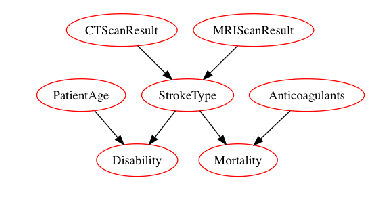

In [48]:
model.plot()

In [49]:
model.predict_proba(
    {'PatientAge':'0+', 'CTScanResult': 'IS'}
                   )[5].parameters

[{'T': 0.5948499999999999, 'F': 0.40515000000000007}]

In [50]:
model.predict_proba(
    {'PatientAge':'65', 'MRIScanResult': 'IS'}
)[6].parameters

[{'Mod': 0.32499999999999996, 'Sev': 0.421, 'Neg': 0.25399999999999995}]

In [53]:
model.predict_proba(
    {'PatientAge':'65', 'CTScanResult':'HS', 'MRIScanResult': 'IS'}
)[4].parameters

[{'SM': 0.10000000000000044, 'HS': 0.3999999999999995, 'IS': 0.5}]

In [54]:
model.predict_proba(
    {'PatientAge':'0+', 'Anticoagulants':'Y', 'StrokeType':'SM'}
)[5].parameters

[{'T': 0.8999999999999999, 'F': 0.1000000000000002}]

In [57]:
model.probability(
    ['0+', 'IS', 'HS', 'Y', 'SM', 'F', 'Sev']
)

5.250000000000009e-06